# Feature Extraction, Feature Generation, Dimensional Reduction and PCA

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

<h2 id="tocheading">Table of Contents</h2>
<div id="toc"></div>

## Introduction

### Format of the Lecture Material

The more technical lectures will be composed of jupyter notebooks.

<https://jupyter.org>

Notebooks are a mixture of code, explanatory material, images, results, ...


You can execute them yourself on your own machine and “play” with the code

<img src="./ml/images/jupyter.png" alt="Jupyter Logo" style="width: 200px;"/>

### scikit-learn (sklearn)

Many examples in the lecture will use the `scikit-learn` library.

<http://scikit-learn.org/stable>

`scikit-learn` is a library for data mining and “classical” machine learning.

The user guide is an excellent resource of examples and mathematical background:
<https://scikit-learn.org/stable/user_guide.html>

<img src="./ml/images/logo.png" alt="Scikit Logo" style="width: 200px;"/>


> Pedregosa, Fabian, et al. "Scikit-learn: Machine learning in Python." the Journal of machine Learning research 12 (2011): 2825-2830.

### pandas

To store our data in memory, for preprocessing and simple queries we will mainly use `pandas`.

`pandas`' main feature is the `DataFrame` class, a 2d-table object providing many methods for data analysis, visualization, aggregation, ...

<https://pandas.pydata.org>


<img src="https://upload.wikimedia.org/wikipedia/commons/e/ed/Pandas_logo.svg" alt="pandas log" style="width: 300px;">

These lectures again come with a `conda` environment for all needed packages:
 
Create the environment:
```
mamba env create -f environment.yml
```


Update:
```
mamba env update -f environment.yml
```   

Activate:
```
conda activate ml
```

Start the notebook server:
```
jupyter notebook
```

### Notation

*We try to follow (with some extensions) the notations in  "Elements of statistical Learning" by Trevor Hastie et al. https://web.stanford.edu/~hastie/ElemStatLearn/ (Free E-Book)* 

This means:

* Capital letters like $X$ or $Y$ denote a generic random variate
* Observations/realizations are small letters, the $i$-th observation of $X$ is $x_i$
* Matrices and vectors are capital, bold-face symbols $\boldsymbol{X}$
* Observations/realizations are *rows* of the matrix while different variables are stored in the *columns*

Example: If we measure $d=2$ variables – e.g. age and weight – of $N = 100$ people, we get a $N \times d$-dimensional matrix $\boldsymbol{X}$.

A single observation – one row – is written as $x_i = (\mathrm{age}, \mathrm{weight} )$.

All observations of the *weight* variable are denoted $\boldsymbol{x}_{\bullet 1}$, similar to the `numpy` indexing `X[:, 1]` (this is an extension to Hasties)

In [3]:
from ml import plots
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap

In [4]:
plots.set_plot_style()

%matplotlib inline

colors = plots.colors
cmap = plots.cmap

### Repetition

Last lecture: Linear Fisher Discriminant:

> Find the hyper plane optimally separating two populations using the Fisher criterion.

Now, we can have a look at a simple example using `sklearn`:

In [5]:
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=250, centers=2, cluster_std=2.0, random_state=12)

In [6]:
y

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0])

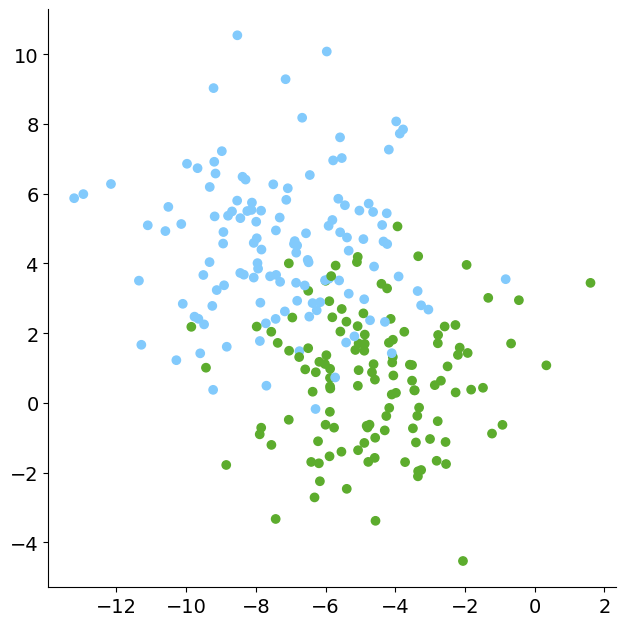

In [7]:
fig, ax = plt.subplots()

ax.set_aspect(1)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

None

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
lda = clf.fit(X, y)

projection = lda.transform(X)

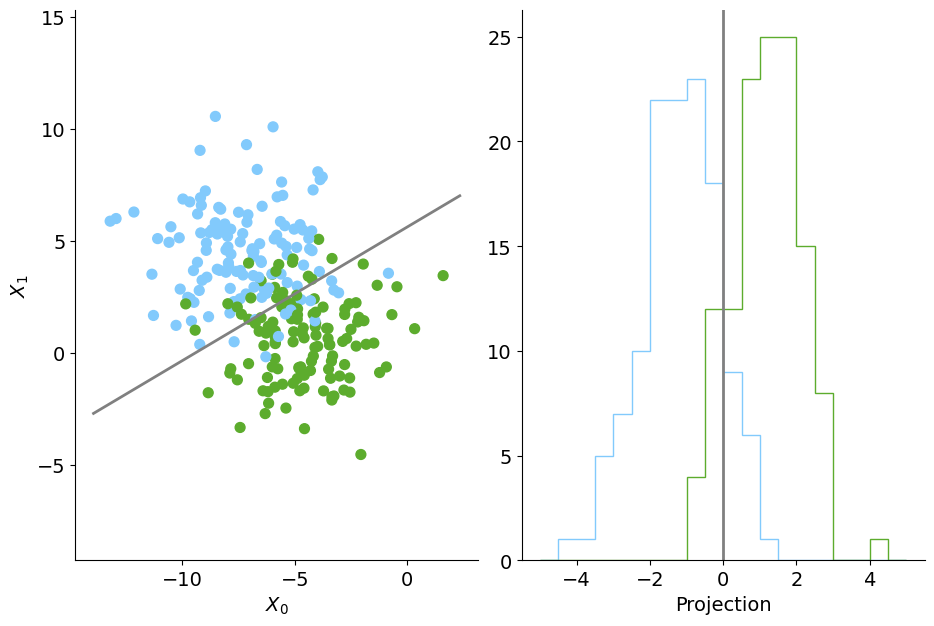

In [9]:
fig, (ax, ax_proj) = plt.subplots(1, 2)

ax.set_aspect(1, 'datalim')
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)

plots.draw_linear_regression_function(lda, color='gray', ax=ax)


ax.set_xlabel('$X_{0}$')
ax.set_ylabel('$X_{1}$')

for label, color in zip((0, 1), cmap.colors):
    ax_proj.hist(projection[y == label], bins=20, range=[-5, 5], color=color, histtype='step')

    
ax_proj.axvline(0, color='gray')
ax_proj.set_xlabel('Projection')
    
None

## Problems with high-dimensional data

> __Curse of dimensionality__
>
> is a term, intrdocued by Richard Bellman,   
> to describe the rapid increase of the volume when adding more dimensions in a mathematical space.
>
> <https://en.wikipedia.org/wiki/Curse_of_dimensionality> 

The higher the dimensionality of the space, the more observations are needed to *sufficiently* cover its volume.

In the following, we will draw 100 samples from a standard uniform distribution, first in 1D, then in 2D

In [10]:
rng = np.random.default_rng(0)

Text(0.5, 1.0, 'Non-empty Bins: 100.00%')

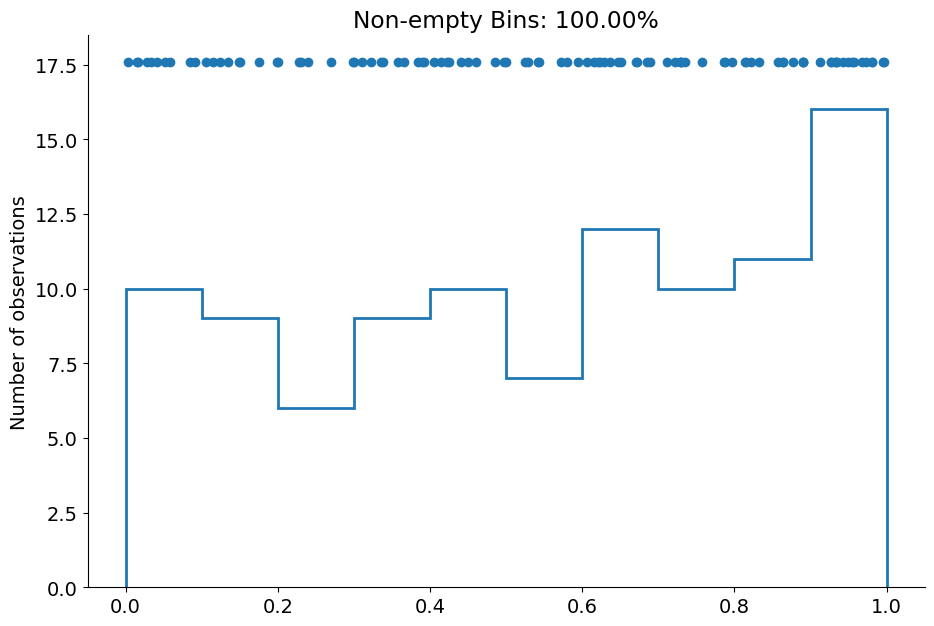

In [11]:
sample = rng.uniform(low=0.0, high=1.0, size=100)

fig, ax = plt.subplots()

hist, edges, plot = ax.hist(sample, range=[0, 1], bins=10, histtype='step', lw=2)

ax.scatter(sample, np.full_like(sample, 1.1 * hist.max()), color='C0')
density = np.count_nonzero(hist) / hist.size

ax.set_ylabel('Number of observations')
ax.set_title('Non-empty Bins: {:.2%}'.format(density))


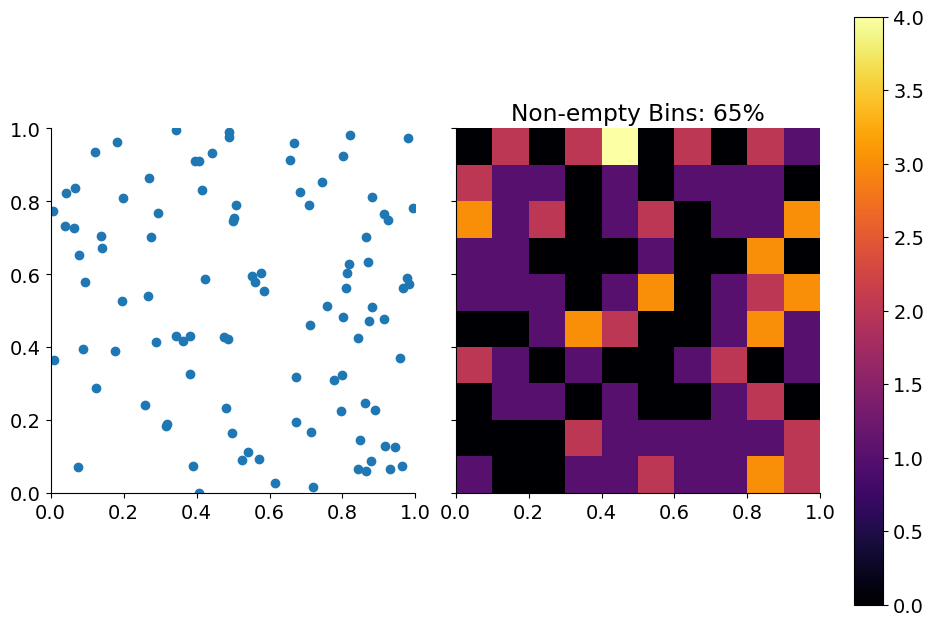

In [12]:
# uniform random numbers in two dimensions
sample = rng.uniform(low=0.0, high=1.0, size=(100, 2))

# a detailed plotting example. In future, we will focus more on the data processing and machine learning
# and many of the plots will be defined as functions in the `ml/plots.py` module, not in the notebook itself

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)


# Einzelne Punkte plotten
ax1.scatter(sample[:, 0], sample[:, 1])
ax1.set_aspect('equal')


# das Histogram plotten
hist, _, _, plot = ax2.hist2d(
    sample[:, 0],
    sample[:, 1],
    range=[[0, 1], [0, 1]],
    bins=10,
    cmap='inferno',
    vmin=0,
)

# Anteil besetzter Bins bestimmen
density = np.count_nonzero(hist) / hist.size

ax2.set_title('Non-empty Bins: {:.0%}'.format(density))
ax2.set_aspect('equal')

fig.colorbar(plot, ax=ax2)
None

In the 1D example, all bins are non-empty. There are no empty bins.

In the 2D case, more than a third of the bins are empty.


Possible mitigation approaches:

1. Collect more data and live with the additional cost / time.
2. Use larger bins, reduces the detail in each sub-dimension.
3. Reduce the number of dimensions, possibly by combining existing dimensions into new ones. 

Just storing more data is almost always impossible, even today.


### Example: IceCube

* The IceCube Neutrino Observatory in Antarctica collects about 1 TB of raw data each day.
* The satellite uplink is limited to about 100 GB per day.  
* The remaing data is shipped once a year on magnetic tapes by container ship.

<img src="./ml/images/icecube.jpg" alt="Drawing" style="width: 400px;"/>

> Never underestimate the data rate of a container ship full of magnetic tapes

In [13]:
# once per year 1 TB is shipped, the ship takes roughly 30 days. 
# Data rate in MBit/s:
365 * 8 * 1024**2 / (30 * 86400)

1181.2661728395062

That's more than a 1GBit/s connection



### Example: SKA

* The Square Kilometer Array is a planned radio observatory, planned in South Africa and Australia.

* It will use tens of thousands of radio antennas.

* The expected raw data rate is expected to be multiple  __petabytes per second__.

* Storage of the raw data is completely impossible given today's and the near future's technology.

In [14]:
from IPython.display import IFrame

IFrame('https://www.youtube.com/embed/8BBoDw2qVD0?rel=0', width=960, height=540)

Highly-dimensional data also lead to very fundamental, mathematical problems.

See this interesting discussians about distance measures:

> Why is Euclidean distance not a good metric in high dimensions?  
>https://stats.stackexchange.com/questions/99171/why-is-euclidean-distance-not-a-good-metric-in-high-dimensions

⇒ We need some form of data reduction

## Data Reduction

Two orthogonal, complementarty approaches:

1. Feature Extraction
    * Hand-crafted new features from higher-dimensional input data:
        * This is a task commonly performed by domain experts to extract as much information as possible
          from high dimensional data into fewer, more descriptive features 
    * General algorithmic reduction of dimensions, e.g. to maximize variance (principal component analysis)
   
1. Feature Selection
    * Remove non-descriptive features 
  


The general approach is:

* Extract lots of hand-crafted features from the highly-dimensional, often irregular raw data
* Perform a feature selection relevant to the given task to further reduce the number


This usually happens in a multi-step procedure, creating higher and higher level abstractions from the original raw data.

Example from Imaging Air Cherenkov Telescopes (IACTs):

* Raw data consists of a charge time-series for each pixel of each telescope camera, possibly with multiple amplification factors (gains).  
  For an array of telescopes, not all telescopes participate in each event.    
  For each telescope, we have data of the shape $(N_\mathrm{gains}, N_\mathrm{pixels}, N_\mathrm{samples})$  
  
* Reduce the waveforms by finding the pulses of Cherenkov signal, reducing the pulse to two numbers: 
    * an amplitude (integral or maximum) converted to the estimated number of Cherenkov photons
    * a time (rising edge or mean arrival time)
  This gives us two "images", one "brightness" and one "time" image
  
* Describe these images with a number of features (includes a Principal Component Analysis)

* Combine these features per telescope to geometrically estimate the geometry of the shower axis (direction and impact point)

* Use this as input for the machine learning for energy estimation and particle type classification

### Feature Extraction

#### Example 1: Simple Data Transformation

Given data points $X = (x_1, x_2, ...) , Y = (y_1, y_2, ...) $.

Assume it is known or can easily be seen that these coordinates are more naturally expressed using polar coordinates:

$$
 \begin{align}
     r &= x^2 + y^2 \\
     \phi &= \operatorname{arctan2}(y, x)    
 \end{align}
$$

In [15]:
from sklearn.datasets import make_circles

def transform(X):
    r = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
    phi = np.arctan2(X[:, 1], X[:, 0])
    return np.column_stack([r, phi])


X_original, y = make_circles(n_samples=500, noise=0.15, factor=0.4, )
X_transformed = transform(X_original)

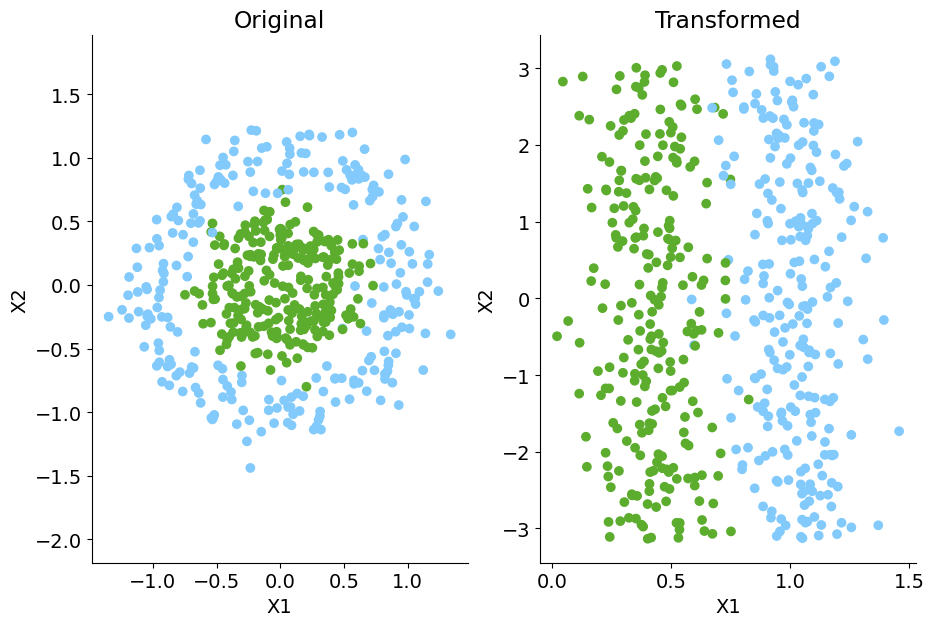

In [16]:
fig, axs = plt.subplots(1, 2)


for X, ax, title in zip((X_original, X_transformed), axs, ('Original', 'Transformed')):
    
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title(title)

axs[0].set_aspect(1, adjustable='datalim')
None

In this example, all information is contained in the new $r$ attribute, we can remove $\phi$ reducing the number of dimensions from 2 to 1

#### Example 2: Data representation

Often, data is not in a suitable represantion for applying the machine learning methods we learn about here.

In general, everything has to be transformed into plain numbers and we need arrive at the 2-d regular matrix $X$ of shape $(N_\mathrm{observations}, N_\mathrm{features})$.

In this example, we look at *text* data from internet forums.

We somehow have to transform this textual data into numerical features.

In [17]:
from sklearn.datasets import fetch_20newsgroups

atheist_texts = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'), categories=['alt.atheism'])
religous_texts = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'), categories=['talk.religion.misc'])

In [18]:
rng = np.random.default_rng(0)

In [19]:
print('** Random sample from the atheist forum: **\n')
print(rng.choice(atheist_texts.data).lstrip())
print('\n'*3)

print('** Random sample from the religon forum: **\n')
print(rng.choice(religous_texts.data).lstrip())

** Random sample from the atheist forum: **

Who has to consider it?  The being that does the action?  I'm still
not sure I know what you are trying to say.




** Random sample from the religon forum: **

Nut or not, he was clearly a liar.  He said he would surrender after
  local radio stations broadcast his message, but he didn't.  Then he
  said he would surrender after Passover, but he didn't.

  None of which excuses the gross incompetence and disregard for the
  safety of the children displayed by the feds.   As someone else
  pointed out, if it had been Chelsea Clinton in there you would 
  probably have seen more restraint.



__Hypothesis 1__: Atheists use more words

Let's look at the length of the texts and see if we can separate the two populations:

Median     : 91 87
75%-Quantile: 172, 235


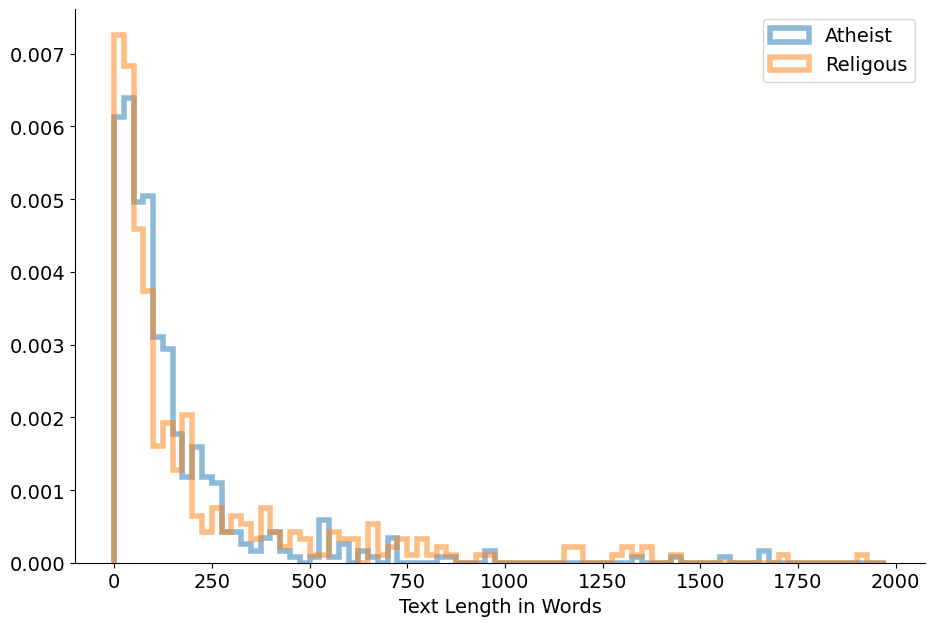

In [20]:
def number_of_words(text: str):
    return len(text.split())

atheist_lengths = list(map(number_of_words, atheist_texts.data))
religous_lengths = list(map(number_of_words, religous_texts.data))


bins =  np.arange(0, 2000, 25)

hist_options = dict(
    bins=bins,
    alpha=0.5,
    density=True,
    histtype='step',
    lw=4,
)

plt.figure()
plt.hist(atheist_lengths,  label='Atheist', **hist_options)
plt.hist(religous_lengths, label='Religous', **hist_options)
plt.xlabel('Text Length in Words')
plt.legend()
None

print(f'Median     : {np.median(atheist_lengths):.0f} {np.median(religous_lengths):.0f}')
print(f'75%-Quantile: {np.percentile(atheist_lengths, 75):.0f}, {np.percentile(religous_lengths, 75):.0f}')

No significant difference visible.

__Hypothesis 2__: Atheists use longer words


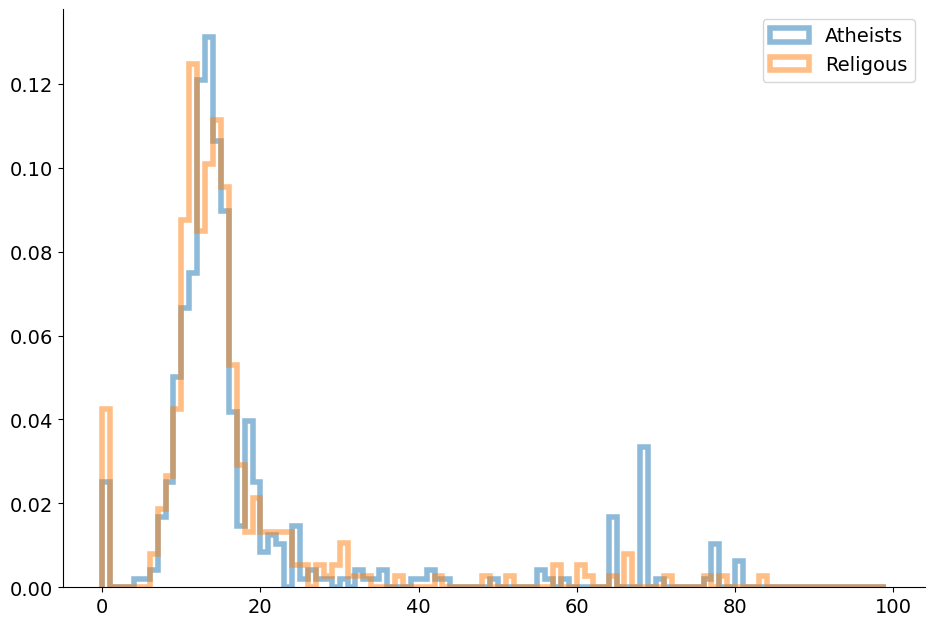

In [21]:
def max_word_length(s):
    words = s.split()
    if not words:
        return 0
    return max(map(len, words))

atheist_lengths = list(map(max_word_length, atheist_texts.data))
religous_lengths = list(map(max_word_length, religous_texts.data))


bins =  np.arange(0, 100, 1)
hist_options = dict(
    bins=bins,
    alpha=0.5,
    density=True,
    histtype='step',
    lw=4,
)

plt.figure()
plt.hist(atheist_lengths, label='Atheists', **hist_options)
plt.hist(religous_lengths, label='Religous', **hist_options)
plt.legend()
None


Where do this enourmous word length come from? It's not German...

We are on to an important point: data preprocessing and "cleaning"

In [22]:
atheist_texts.data[2].split()[40:]

["It's",
 'not',
 'a',
 'very',
 'good',
 'example',
 'to',
 'show',
 'citizenship',
 'without',
 'descent.',
 'Karl',
 '-----------------------------------------------------------------------------']

__Hypothese 4__: Atheist and religous people use different words.

65 225 72 137 107 81 147 83 95 94 93 62 63
68 104 75 44 45 46 47 178 56 58 91


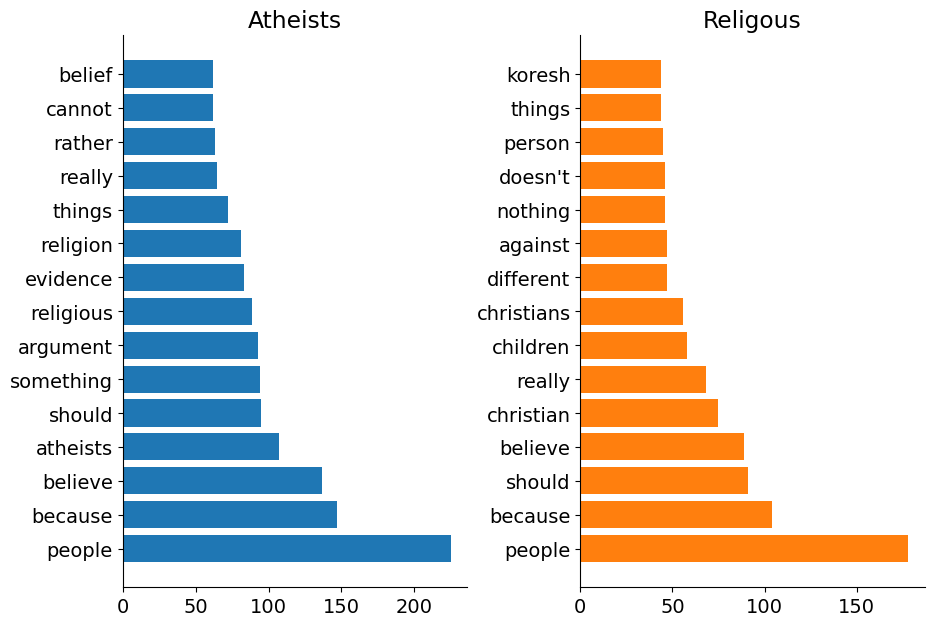

In [23]:
import string
from collections import Counter


def extract_words(texts):
    return (
        ' '.join(texts.data)           # join all texts to one giant string
        .lower()                       # all to lower case
        .translate(string.punctuation) # remove punctuation ,.- etc.
        .split()                       # split sring into list of words at whitespace
    )


def most_common(words, n, min_length=5):
    counter = Counter(filter(lambda w: len(w) > min_length, words))
    return dict(counter.most_common(n))


atheist_words = extract_words(atheist_texts)
common_atheist_words = most_common(atheist_words, 15)

religous_words = extract_words(religous_texts)
common_religous_words = most_common(religous_words, 15)


f, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_title('Atheists')
ax1.barh(list(common_atheist_words.keys()), list(common_atheist_words.values()))

ax2.set_title('Religous')
ax2.barh(list(common_religous_words.keys()), list(common_religous_words.values()), color='C1')


atheist_set = set(common_atheist_words.values())       
religous_set = set(common_religous_words.values())
s = atheist_set | religous_set
print(*(atheist_set - religous_set))
print(*(religous_set - atheist_set))

This kind of data reduction

* requires (the obtaining) of large amounts of expert domain knowledge
* gets harder and harder as data volume and dimensionality rise
* is a very tedious process
* usually obtained the best results... until relatively recently

### Principal Component Analysis (PCA)


PCA searches for a basis in the data space that maximizes the variance along the basis vectors.

Given $N$ data points in $d$ dimensions that shall be transformed to $k < d$  dimensions.

We do this by defining a new basis, combining the original features.

High-Level approach:

0. Centralize data points with respect to their mean.
1. Calculate the covariance matrix $\mathrm{Cov}(X)$ of the data matrix $\boldsymbol{X}$
2. Compute Eigenvalues und Eigenvectors of the covarinace matrix
3. Choose the $k$ largest Eigenvalues and the corresponding Eigenvectors. 
4. Fill the $d \times k$ matrix $\boldsymbol{W}$ with the $k$ Eigenvectors.
5. Apply $\boldsymbol{W}$ to each row $x_i$ of $\boldsymbol{X}$ ⇒ $x^\prime = \boldsymbol{W}^T \cdot x^T $ 
    

###### 1. Centralization 

Compute mean vector $\mu$:

$$
\boldsymbol{\mu} = \begin{pmatrix}
    \bar{\boldsymbol{x}}_1 \\
    \ldots \\
    \bar{\boldsymbol{x}}_d \\
\end{pmatrix}
 = \frac 1 N
 \begin{pmatrix}
    \sum_{i=0}^{N} \boldsymbol{x}_{1, i} \\
    \ldots \\
    \sum_{i=0}^{N} \boldsymbol{x}_{d, i} \\
\end{pmatrix}
$$

Alternative formulation:
$$
\boldsymbol{\mu} = \begin{pmatrix}
    \text{Mean over all observations of attribute 1}\\
    \ldots \\
    \text{Mean over all observations of attribute 1}\\
\end{pmatrix}
$$

New data point:

   $$
      x^{\prime}_i = x_i - \boldsymbol{\mu}
   $$

###### 2. Covariance

The covariance matrix of a random variable $X$ in arbitrary dimensions:
$$
\operatorname {Cov} (X)=\operatorname {E} {\bigl [}(X-\operatorname {E} (X))\cdot (X-\operatorname {E} (X))^T{\bigr ]}
$$

Estimation of the covariance matrix is possible through *simple* matrix operations.

###### 3. Eigenvalues und Vectors

Compute the $d$ different Eigenvalues of $ \operatorname {Cov} (\boldsymbol {X} )$.

Obtain Eigenvalues $\lambda_1, \ldots, \lambda_d$ with corresponding Eigenvectors $v_1, \ldots, v_d$


###### 4. Sorting and Choosing a Subset

Sort indices of eigenvalues and -vectors so that:
$$
\lambda_1 > \lambda_2 > \lambda_3 \ldots > \lambda_d
$$

Choose the $k$ largest eigenvalues and discard the rest.


###### 5. Create the Transformation Matrix

Use the $k$ chosen eigenvectors as columns of the matrix $\boldsymbol{W}$

$$
\boldsymbol{W} = \begin{pmatrix}
    v_1, 
    \ldots,  
    v_k
\end{pmatrix}
= \begin{pmatrix}
    v_{1,1}, 
    \ldots,  
    v_{k, 1} \\
    \ldots \\
        v_{1,d}, 
    \ldots,  
    v_{k, d}
\end{pmatrix}
$$

###### 6. Transformations

Multiply the transformation matrix $\boldsymbol{W}$ to each observatoin $x_i$ in $\boldsymbol{X}$ to obtain the new observations reduced to $k$ dimensions:

$$
\boldsymbol{X^\prime} = \boldsymbol{X} \boldsymbol{W}
$$

# rng = np.random.default_rng(0)

N = 8 # Number of observations
d = 4 # Number of dimensions
k = 2 # Number of dimensions after reduction

X = rng.normal(size=(N, d))

In [24]:
# centralize
X = X - X.mean(axis=0)
k=2

# compute covariance
c = np.cov(X, rowvar=False)

# compute eigenvalues and eigenvectors
# eigh already sorts the eigenvalues, but ascending (smallest first)
l, W = np.linalg.eigh(c)

# Invert order
l = l[::-1]
W = W[:, ::-1]

# Select first k
l = l[:k]
W = W[:, :k]

X_prime = X @ W

In [25]:
X.shape, X_prime.shape

((500, 2), (500, 2))

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=k)
X_prime_sklearn = pca.fit_transform(X)


with np.printoptions(precision=2):
    print('By Hand:\n', X_prime)
    print('sklearn:\n', X_prime_sklearn)

# testen aller einträge auf gleichheit (bis auf vorzeichen)
print('\n All close:', np.allclose(np.abs(X_prime), np.abs(X_prime_sklearn)))

By Hand:
 [[-1.60e+00  4.54e-01]
 [ 1.84e+00 -2.81e-01]
 [-2.11e+00  2.22e-01]
 [ 2.63e+00 -1.53e-01]
 [ 2.50e-01 -3.35e-01]
 [-2.12e+00 -3.31e-01]
 [-2.13e+00 -6.60e-02]
 [-1.08e+00  4.85e-01]
 [-2.89e+00 -5.20e-01]
 [ 2.59e+00 -3.14e-01]
 [-1.58e+00 -1.77e-01]
 [ 2.33e+00  1.95e-01]
 [-2.22e+00 -4.02e-01]
 [ 2.56e+00  9.15e-02]
 [-2.32e-01 -4.82e-01]
 [-2.58e+00  5.78e-02]
 [ 2.92e+00  3.10e-01]
 [-2.30e+00 -2.15e-01]
 [-8.95e-01 -1.54e-01]
 [-1.91e+00 -1.96e-01]
 [-5.76e-01 -1.89e-01]
 [ 1.03e+00 -3.26e-01]
 [-2.32e+00  3.24e-01]
 [ 1.68e+00  2.71e-01]
 [ 1.47e+00  3.95e-01]
 [ 2.07e+00  1.88e-01]
 [-1.53e+00  3.19e-01]
 [-2.76e+00  4.13e-01]
 [-4.92e-02 -3.55e-01]
 [-8.03e-01 -2.63e-01]
 [ 1.07e+00 -1.97e-01]
 [ 1.82e+00 -5.20e-01]
 [-1.05e+00  3.35e-01]
 [ 2.25e+00  2.03e-01]
 [-1.93e-01 -6.75e-01]
 [ 2.09e+00  3.35e-01]
 [ 1.33e+00  6.13e-02]
 [-2.17e+00  2.42e-01]
 [ 3.07e+00  2.35e-01]
 [-8.27e-02  9.89e-02]
 [ 2.75e+00  3.20e-01]
 [-2.13e+00  2.50e-01]
 [-2.31e+00 -4.41e-01]
 


#### Example in 3D

An artifical data set using $d = 3$ Dimensionen is reduced to $k=2$ dimensions.   

The data set is composed of two normally-distributed populations.

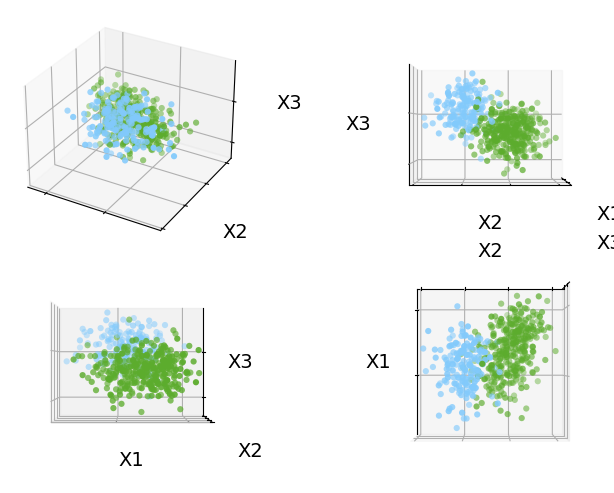

In [27]:
X, y = make_blobs(n_samples=500, n_features=3, cluster_std=3, random_state=2)
plots.plot_3d_views(X, y)

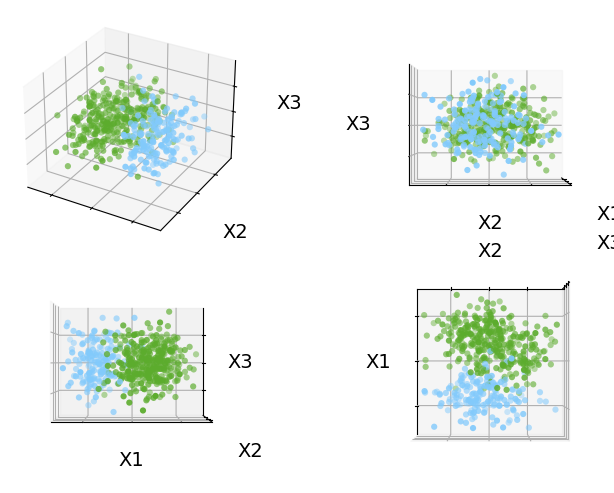

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
transformed = pca.fit_transform(X)

plots.plot_3d_views(transformed, y)

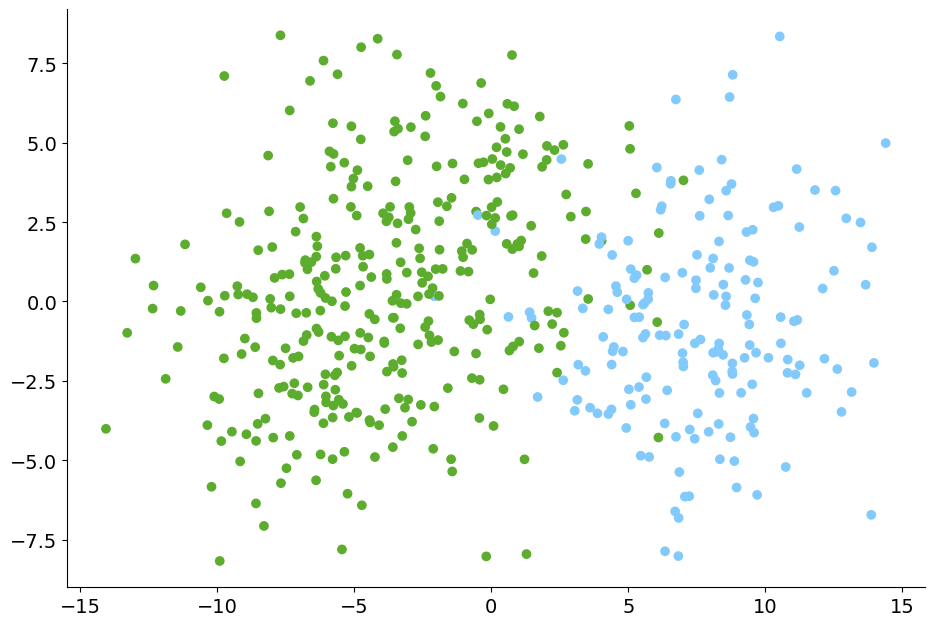

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transformed = pca.fit_transform(X)

plt.figure()
plt.scatter(transformed[:, 0], transformed[:, 1], c=y, cmap=cmap)
None

#### Example: Facial Recognition 

Given each pixel of an image as one feature, where the value is a gray-scale value between 0 (black) and 1 (white).


Each image is stored as a 1d vector, row after row.
Multiple images give us the matrix $\boldsymbol{X}$

If our images have a resolution of $64 \times 64$ pixels, we get a vector of length $4096$.

##### Simple Facial Recognition 

Assume the task is the assigment of photos of all students of TU Dortmund University to their names.


We look for a function that transforms an image into a name.


Idea:
1. Store images of all students in a matrix $\boldsymbol{X}$ of dimensionality $N_\text{studens} \times N_\text{pixels}$ and a vector of labels of length $N_\text{students}$ containing the names (or matriculation ID)
2. Compute the distance $D$ between a new photo $x_{\text{neu}}$ to all photos stored in $\boldsymbol{X}$
3. Return $y_i$ corresponding to the $i$ where $D(x_{\text{neu}}, x_i)$ is minimal.

Problems: 
 - Storing so many images in memory is difficult to impossible. 
 - Computing the distance will take a long time.
 - As discussed above, chosing the right distance measure for this very high dimensional data set might be difficult.
 
##### Eigenfaces 

*Original Article from 1991 by Turk and Pentland http://www.mitpressjournals.org/doi/10.1162/jocn.1991.3.1.71*

The input stays the same, the matrix of all photos $\boldsymbol{X}$. However, this time, we don't store the full image information.

Idea:
1. Apply a PCA to $\boldsymbol{X}$. 
2. Obtain transformation matrix $\boldsymbol{W}$ of shape $d \times k$
3. Calculate weights $g_m = \boldsymbol{v}_m^T \cdot(x_i - \boldsymbol{\mu}) $ for each iamge $x_i$ and each eigenvector $\boldsymbol{v}_m$ with $m \in \{1, \ldots, k\}$ and obtain an weight vector $G$ of length $k$.
4. Compute distance $D$ between weight vectors of all "training images" and the new image $G_{\text{new}}$
5. Return  $y_i$ with $i$ for which $D(G_{\text{neu}}, G^{i})$ is minimal.

In reality, computing a PCA on very large, high-dimensional data sets is not as trivial as it seems above.

###### Python Example for Eigenfaces

The LFW (Labeled Faces in the Wild) data set is a common data set to benchmark algorithms for facial recognition:   
http://vis-www.cs.umass.edu/lfw/

It comprises ca. 13,000 images of famous (as of ca. 2003) people.
We choose a subset here that requires a minimum number of images for each person.

In [30]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=0.8)

h, w = lfw_people.images[0].shape

X = lfw_people.data
y = lfw_people.target

# remove border pixels
border = 10
width = w - 2 * border
height = h - 2 * border
X = X.reshape((-1, h, w))[:, border:-border, border:-border].reshape((-1, height * width))


names = lfw_people.target_names

X.shape, y.shape

((3023, 4400), (3023,))

In [31]:
len(lfw_people.target_names)

62

In [32]:
rng = np.random.default_rng(11)

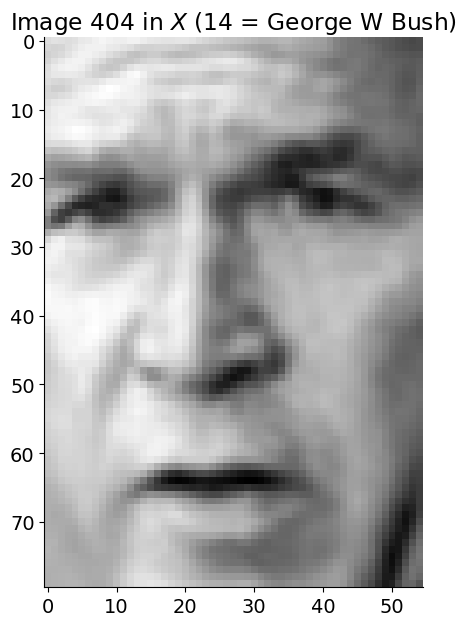

In [33]:
index = rng.choice(len(lfw_people.images))

fig, ax = plt.subplots()
plot = ax.imshow(X[index].reshape(height, width), cmap='gray')
title = ax.set_title(rf'Image {index} in $\mathbf{{\mathit{{X}}}}$ ({y[index]} = {names[y[index]]})')

Text(0.5, 1.0, 'Mean Face (Lord Voldemort)')

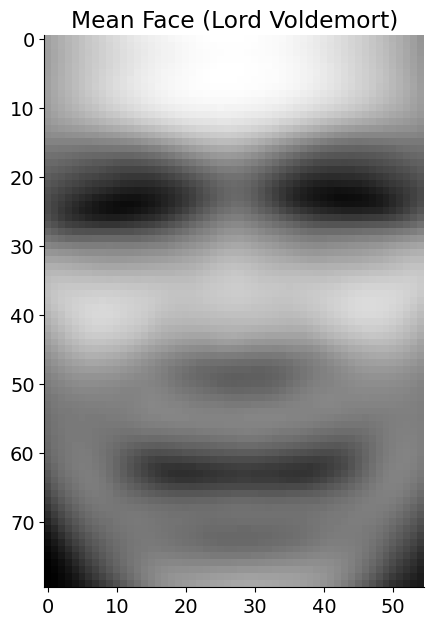

In [34]:
mean_face = X.mean(axis=0).reshape(height, width)

plt.figure()
plt.imshow(mean_face, cmap='gray')
plt.title('Mean Face (Lord Voldemort)')

In [35]:
n_components = 100
pca = PCA(n_components=n_components)
pca.fit(X)

eigenfaces = pca.components_.reshape((n_components, height, width))

Text(0.5, 1.0, 'Eigenface of Eigenvalue 98')

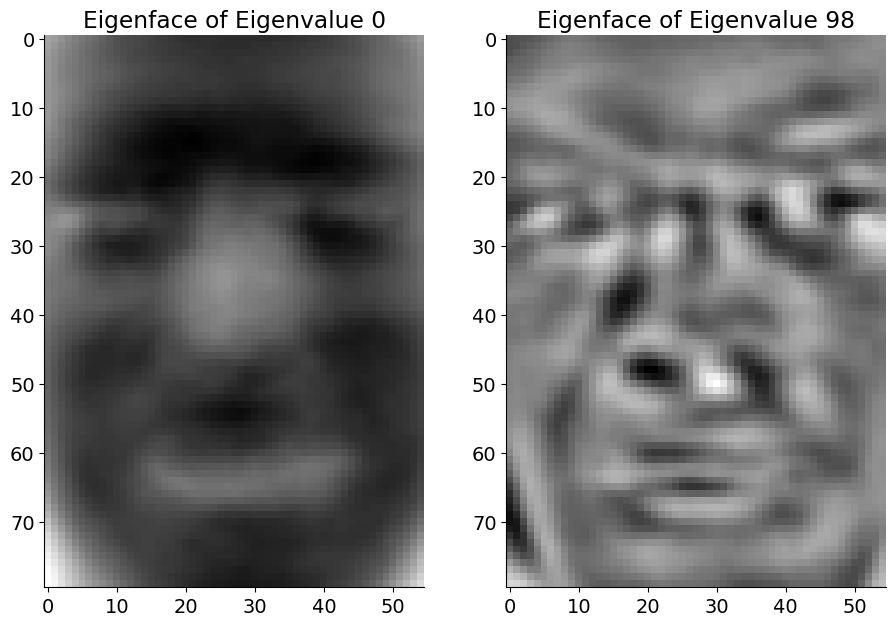

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(eigenfaces[0], cmap='gray')
ax1.set_title('Eigenface of Eigenvalue 0')

ax2.imshow(eigenfaces[n_components - 2], cmap='gray')
ax2.set_title(f'Eigenface of Eigenvalue {n_components - 2}')

## Facial Recognition

We choose a single test image and try to find other images that are "similar" to it, via the distance of the PCA weight vectors:

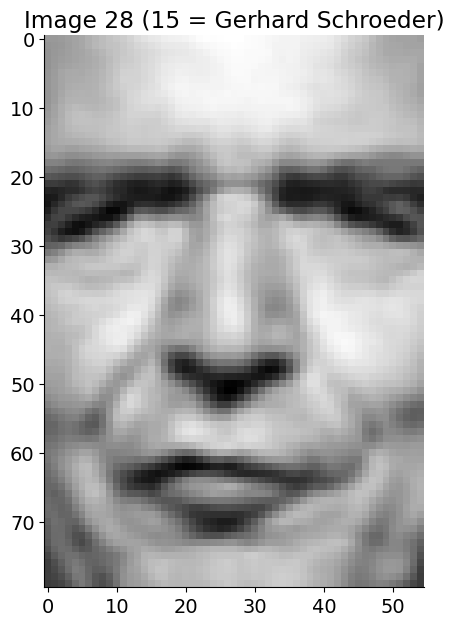

In [37]:
index = 28
test_img = X[index]
test_name = names[y[index]]

X_rest = np.delete(X, index, axis=0)
y_rest = np.delete(y, index)

plt.figure()
plt.title(f'Image {index} ({y[index]} = {test_name})')
plt.imshow(test_img.reshape(height, width), cmap='gray')

In [38]:
# for this large an input, sklearn uses a randomized pca by default
# make sure to use the normal one we introduced above (slower)
pca = PCA(n_components=n_components, svd_solver='full')

X_trafo = pca.fit_transform(X_rest)
test_trafo = pca.transform(test_img[np.newaxis, :])

distance = np.linalg.norm(X_trafo - test_trafo, ord=2, axis=1)

best_matches = np.argsort(distance)
worst_matches = best_matches[::-1]

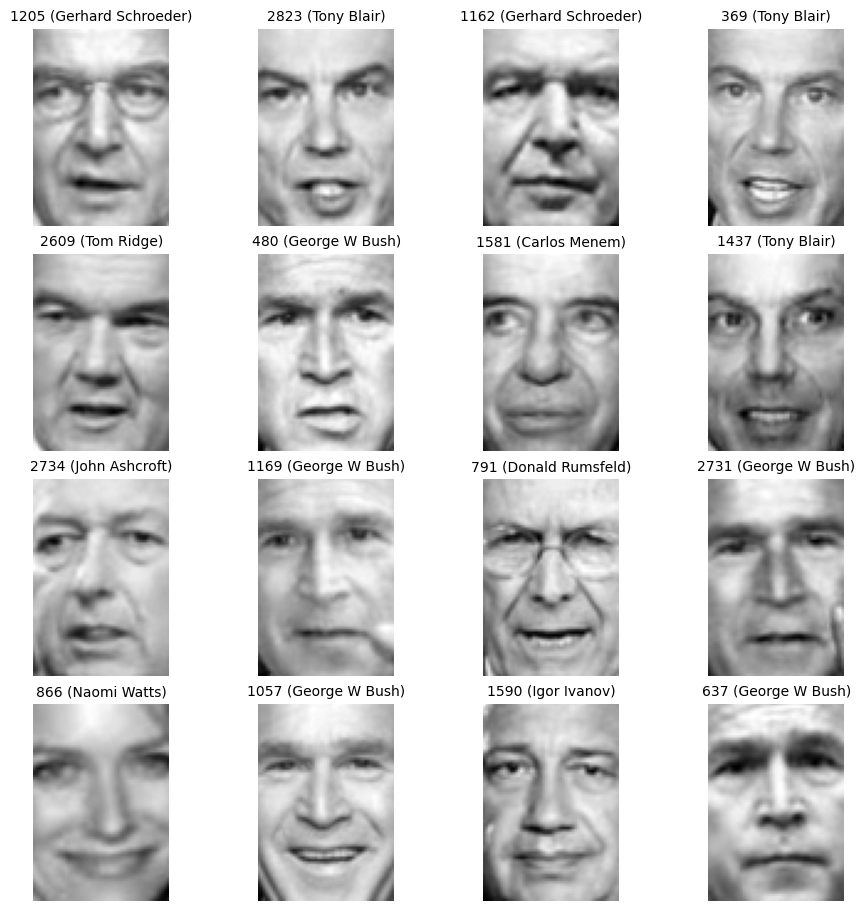

In [39]:
fig, axs = plt.subplots(4, 4, figsize=(9, 9))

for ax, index in zip(axs.flat, best_matches):
    prediction = names[y_rest[index]]
    ax.imshow(X_rest[index].reshape(height, width), cmap='gray')
    ax.set_title(f'{index} ({prediction})', fontsize=10)
    ax.set_axis_off()

None

### Disadvantages of the PCA

Interpretability?

Especially in scientific contexts, the new features are hard to understand.


Assumption: we observe an energy $E$, time $t$ and coordinates $(x, y)$.

* What is a meaning of a principal component, which is computed as:
  $$
    0.78 \cdot E - 0.23 \cdot t + 0.8 \cdot x - 0.2 \cdot y ?
  $$
  

* Units? Is it just unitless? Or did we find a real physical "feature" with units? 

    $$
        \frac{0.78}{\mathrm{GeV}} \cdot E
        - \frac{0.23}{\mathrm{s}} \cdot t
        + \frac{0.8}{\mathrm{m}} \cdot x
        - \frac{0.2}{\mathrm{m}} \cdot y
    $$

## Feature Selection 

* The second approach to dimensional reduction.
* Instead of transforming the data, we "just" discard features
* Goal: keep as much relevant information as possible
* This means it is highly problem specific, which features are "relevant"

General idea:

> Good feature subsets contain features highly correlated with the classification, yet uncorrelated to each other.
> 
> -- Mark Hall

### Univariate Feature Selection

* Only look at one feature (and the target) at a time
* Neglects correletions between features

#### Correlation with the target quantity

* Assume we want to estimate a quantity $y$ from an $N$-dimensional dataset.
* However, parts of this dataset have high noise or have no causal or statistical relationship to $y$ 


* Simplest approach: look for $k$ features with highest pearson correlation, discard the rest


Example: a 4d dataset where only two features are relevant:

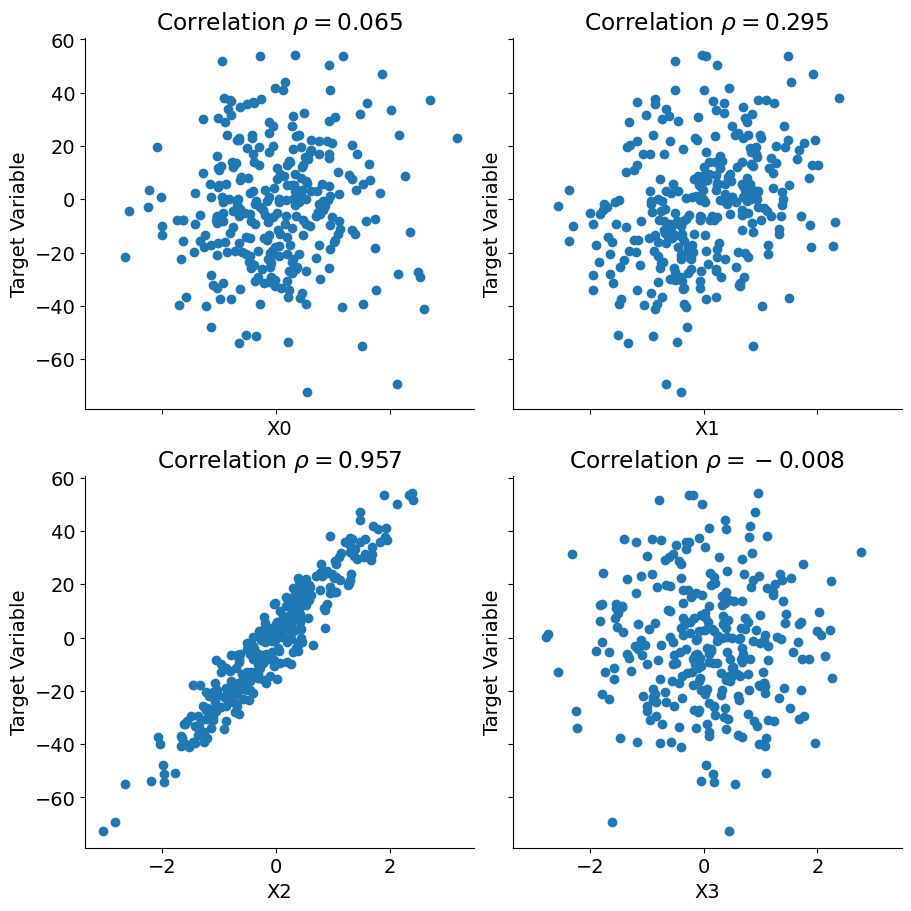

In [40]:
from sklearn.datasets import make_regression
from scipy.stats import pearsonr

X, y = make_regression(n_samples=300, n_features=4, n_informative=2, n_targets=1, random_state=0, noise=0.1)

fig, axs = plt.subplots(2, 2, figsize=(9, 9), sharex=True, sharey=True)

for i, (ax, col) in enumerate(zip(axs.flat, X.T)):
    ax.scatter(col, y)
    ax.set_ylabel('Target Variable')
    ax.set_xlabel('X{}'.format(i))
    
    r, _ = pearsonr(X[:, i], y)
    ax.set_title(rf'Correlation $\rho = {r:.3f}$')

### Multivariate Feature Selection

Multivariate approaches try to take correlations between features into account.

Some criteria that might be used for subsets of features

* [Mutual information](https://en.wikipedia.org/wiki/Mutual_information)
* [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy)
* [Minimal description length](https://en.wikipedia.org/wiki/Minimum_description_length)
* Performance of the estimator


In general, it's impossible to test all combinations of attributes, as
the number of combinations grows exponentially with the number of attributes.

Given $n$ attributes, the binomial theorem gives us the number of combinations:

$$
N = \sum_{k = 1}^{n} \begin{pmatrix}
    n\\
    k\\
    \end{pmatrix} = 2^n - 1
$$




#### Correlated Features

In the example below, it is obvious that two features are strongly correlated.

One of these features is thus superfluous or redundant.

To find correlated attributes, we "only" need to compute the correlation coefficient for pairs of features, yielding a quadratic runtime.

Correlation between feature 1 and 2 : -0.21
Correlation between feature 1 and 3 : 0.95
Correlation between feature 2 and 3 : 0.10


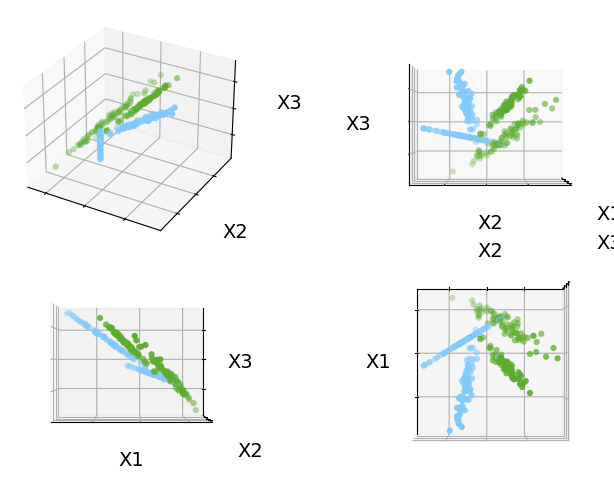

In [41]:
from sklearn.datasets import make_classification
from scipy.stats import pearsonr
from itertools import combinations

X, y = make_classification(n_samples=300, n_features=3, n_informative=2, n_redundant=1, n_repeated=0, n_classes=2, n_clusters_per_class=2, random_state=0)
plots.plot_3d_views(X, y)

for i, j in combinations(range(3), 2):
    r, p = pearsonr(X[:, i], X[:, j])
    print('Correlation between feature {} and {} : {:.2f}'.format(i + 1, j + 1, r))

There are a couple of "greedy" strategies to reduce the number of combinations to be tested.

Most of them only look at pairs of features and are thus called "bivariate"

The two simplest and most commonly employed are *Forward* and *Backward* Selection


###### Forward Selection:

Start with a single attribute and add further attributes according to some to be defined criterion
until a termination condition is reached (e.g. the wanted number of features).

###### Backward Selection:

Start with all attributes and consecutively *remove* features until a condition is reached.


#### Max-Relevance, Min-Redundancy (mRMR)

Original Publication by Peng et al. (2005): [ieeexplore.ieee.org/document/1453511/](ieeexplore.ieee.org/document/1453511/)

Choose the subset of features $S_k = \{f_1, f_2, \ldots, f_k\}$ that as a whole has the highest relevance towards the target variable $y$ and at the same time has the lowest correlation between the features in $S_k$.

The measure of relevance is often a correlation measure or the Mutual Information (more on that later):

For the search for $S_k$, it should hold $\max _{S_{k}}(D - R)$, with:

\begin{align}
D(S, y) =& {\frac {1}{|S|}}\sum _{f_{i}\in S}I(f_{i}, y) \\
R(S)   =& {\frac {1}{|S|^{2}}}\sum _{f_{i},f_{j}\in S}I(f_{i}, f_{j}) 
\end{align}

The subsets are created via forward selection. The next attribute is choses as 

$$
\mathrm {mRMR} =\max _{S}\left[{\frac {1}{|S|}}\sum _{f_{i}\in S}I(f_{i}, y)-{\frac {1}{|S|^{2}}}\sum _{f_{i},f_{j}\in S}I(f_{i}, f_{j})\right].
$$

The mRMR algorithm belongs to a class of algorithms that try to maximize relevance while minimizing redundancy, it has some interesting properties and is especially interesting for applications in biology and genetics, where it is common to have more features than observations.

Think few participants to a medical study but tens of thousands of genes.


**Feature Selection is most relevant when the number of attributes is larger than the number of observations $d > N$**

### Problems

Algorithms like mRMR that rely on an iterative approach like forward selection are called "greedy" heuristics.


It is not guaranteed, that the global optimum is reached using a greedy heuristic.

This of course depends on the algorithm and the target function.


However, it is almost always difficult to impossible to find *the* optimum in finite time/resources.

Interresanting article:

https://en.wikipedia.org/wiki/Multivariate_mutual_information



All approaches here assume that completely unusable attributes have already been removed in preprocessing, e.g.:

* Labels from the simulation not available on observed data
* Attributes that have large mismatches between observed and simulated data